In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pwr = np.fromfile('/home/scott/chinese-spaceplane/pwr_100Hz.f32', dtype = 'float32')
t_start = np.datetime64('2023-12-17T03:00:02')
t = t_start + np.arange(pwr.size) * 1e-2 * 1e9 * np.timedelta64(1, 'ns')

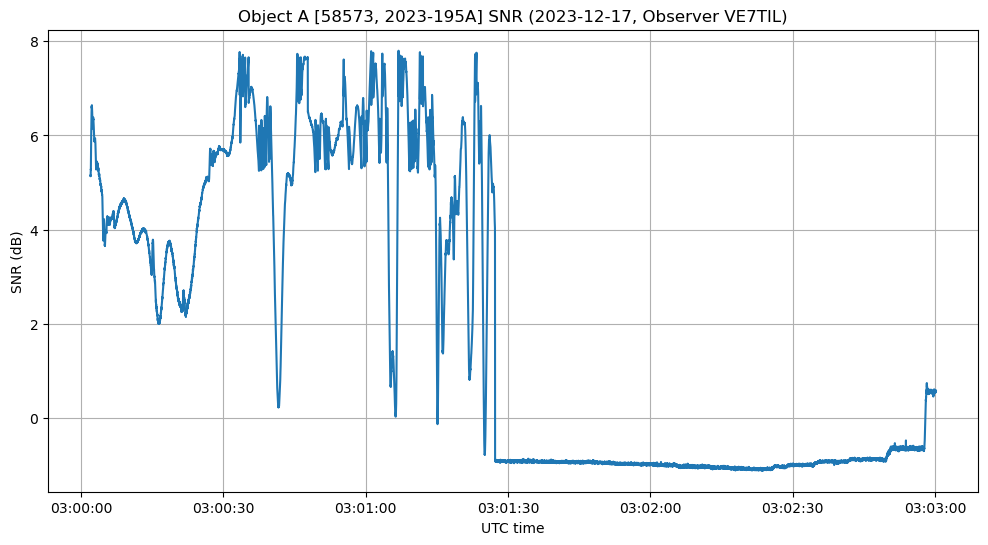

In [3]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(t, 10*np.log10(pwr) - 31.5)
plt.title('Object A [58573, 2023-195A] SNR (2023-12-17, Observer VE7TIL)')
plt.ylabel('SNR (dB)')
plt.xlabel('UTC time')
plt.grid()

In [4]:
fsym = 3069000
symbols = np.memmap('/home/scott/chinese-spaceplane/soft_symbols.i8', dtype = 'int8')

In [5]:
skip = int((np.datetime64('2023-12-17T03:00:02') - t_start)/np.timedelta64(1, 's') * fsym)
x = symbols[skip:][:fsym * 60]
x_small = x[fsym * 29 : fsym * 31]

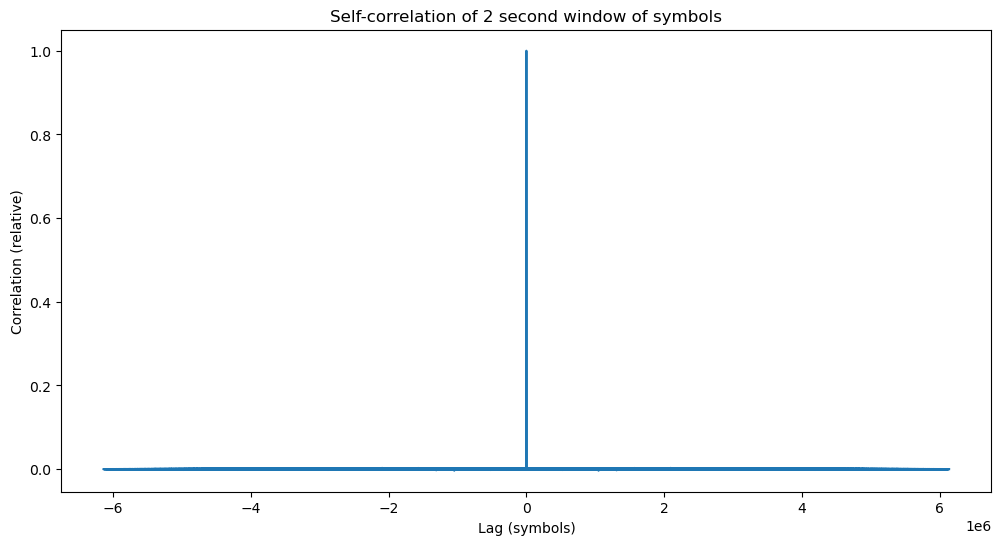

In [6]:
corr_x = scipy.signal.correlate(x_small.astype('float'), x_small.astype('float'))
corr_x /= np.max(np.abs(corr_x))
plt.figure(figsize = (12,6), facecolor = 'w')
lags = np.arange(-x_small.size+1, x_small.size)
plt.plot(lags, corr_x)
del lags, corr_x
plt.title('Self-correlation of 2 second window of symbols')
plt.ylabel('Correlation (relative)')
plt.xlabel('Lag (symbols)');

In [7]:
y_small = -x_small[1:].astype('float') * x_small[:-1].astype('float')

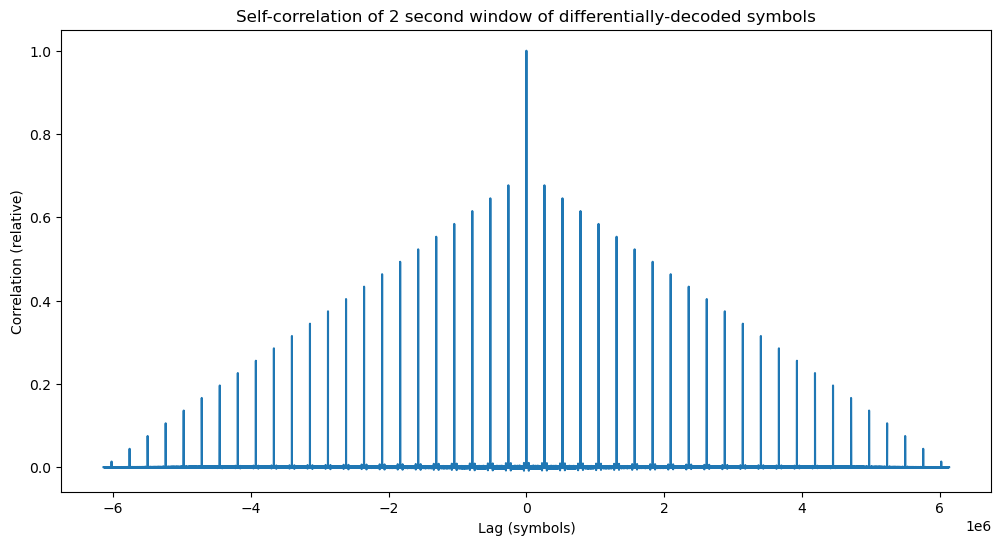

In [8]:
corr_y = scipy.signal.correlate(y_small, y_small)
corr_y /= np.max(np.abs(corr_y))
plt.figure(figsize = (12,6), facecolor = 'w')
lags = np.arange(-y_small.size+1, y_small.size)
plt.plot(lags, corr_y)
del lags
plt.title('Self-correlation of 2 second window of differentially-decoded symbols')
plt.ylabel('Correlation (relative)')
plt.xlabel('Lag (symbols)')
P = np.argmax(corr_y[corr_y.size//2+1:]) + 1
del corr_y

In [9]:
P

261888

In [10]:
256 * 1023

261888

In [11]:
 #Re-run to regenerate the object_A_bits_packed.u8 file
bits = (x >= 0).astype('uint8')
bits = bits[1:] ^ bits[:-1] ^ 1
np.packbits(bits).tofile('object_A_bits_packed.u8')

In [12]:
bits = np.unpackbits(np.fromfile('object_A_bits_packed.u8', dtype = 'uint8'))

In [13]:
bb = bits[:bits.size//P*P].reshape((-1,P))

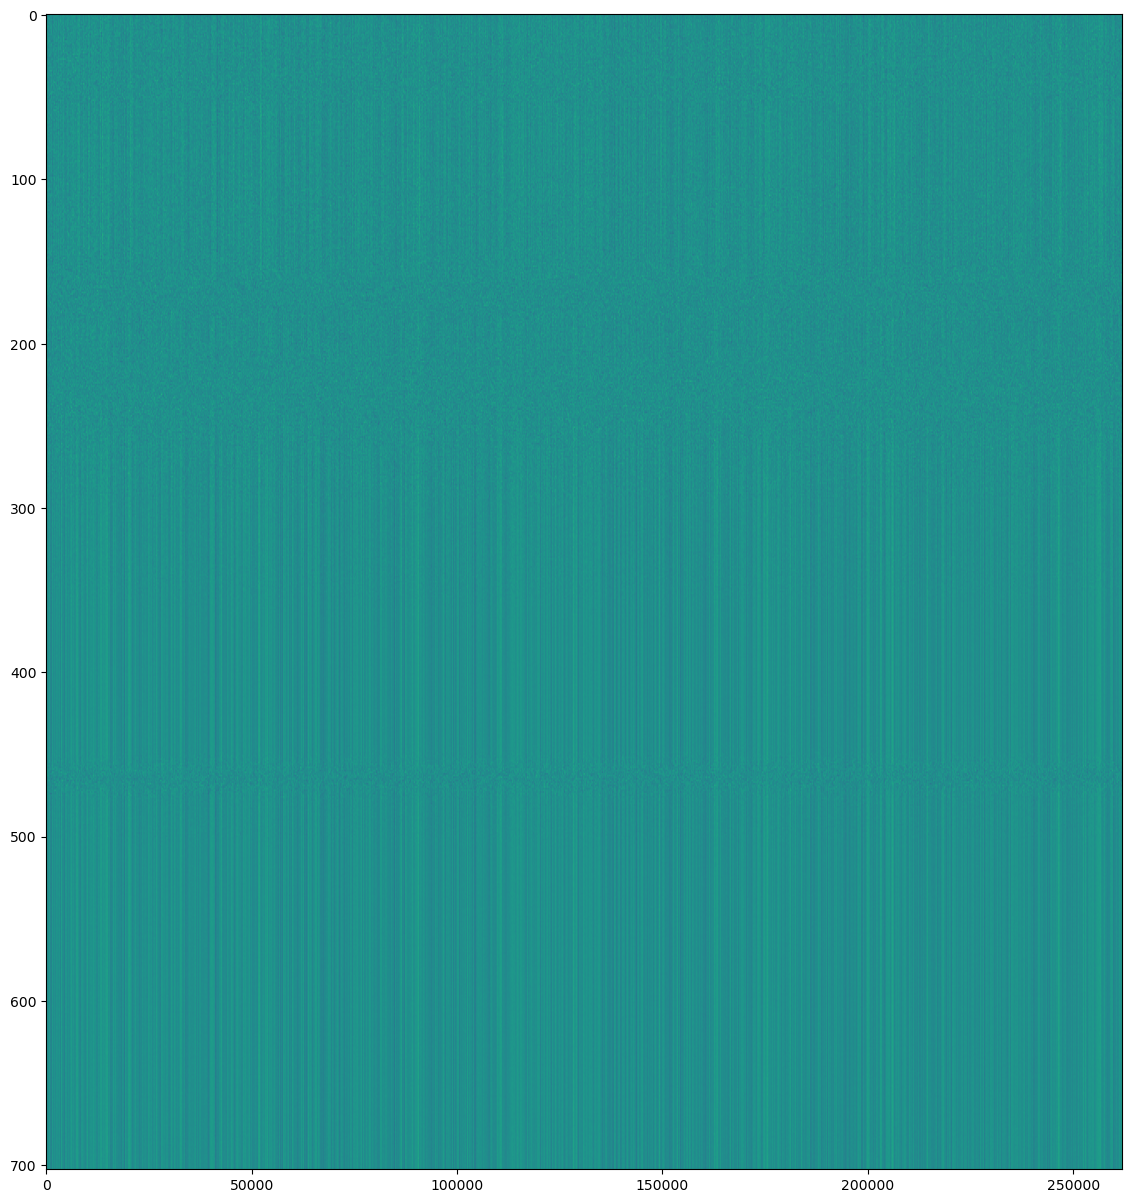

In [14]:
plt.figure(figsize = (15,15), facecolor = 'w')
plt.imshow(bb, aspect = 400);

In [15]:
section = slice(250,340)

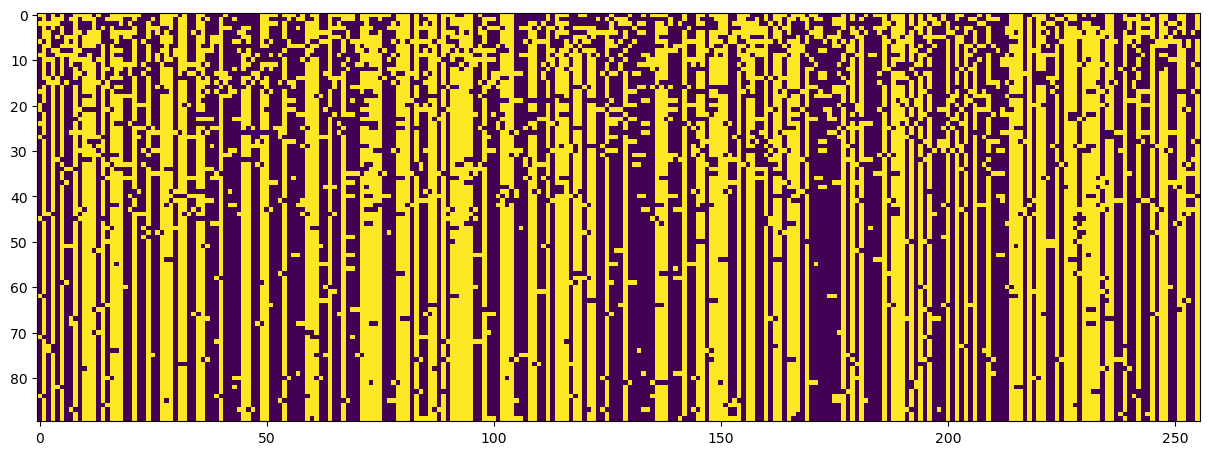

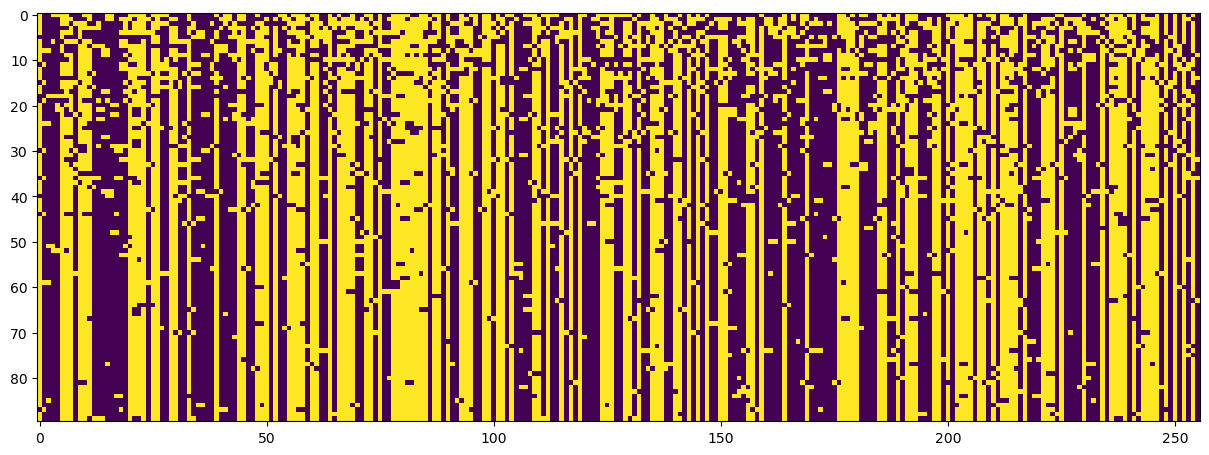

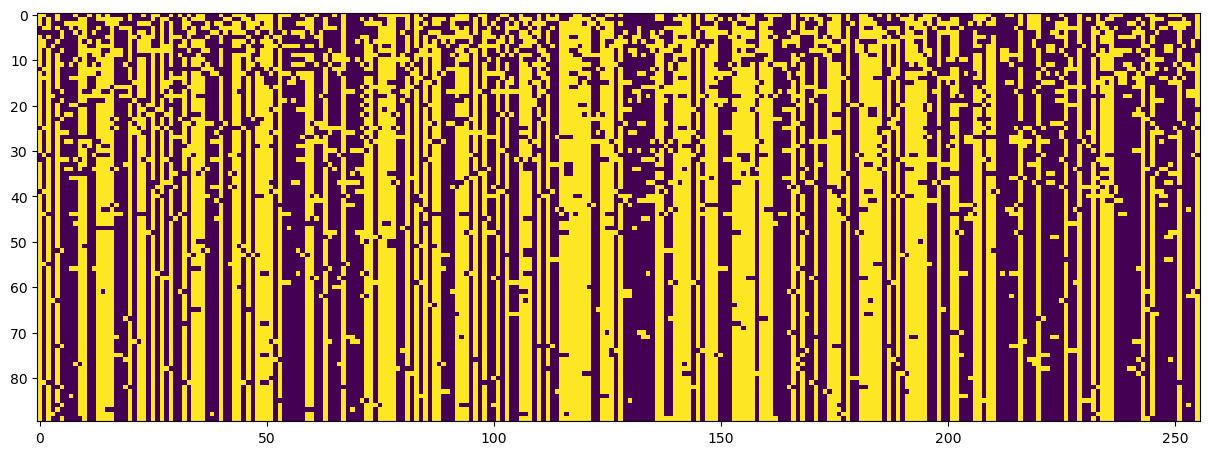

In [16]:
for j in range(0,256*3,256):
    plt.figure(figsize = (15,15), facecolor = 'w')
    plt.imshow(bb[section,j:j+256], aspect = 1)

In [17]:
flips = ~np.all(bb[section] == bb[section][0], axis = 0)

In [18]:
list(zip((np.where(flips)[0]//51)[:100], (np.where(flips)[0]%51)[:100]))

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 50),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (1, 42),
 (1, 43),
 (1, 44),
 (1, 45),
 (1, 46),
 (1, 47),
 (1, 48)]

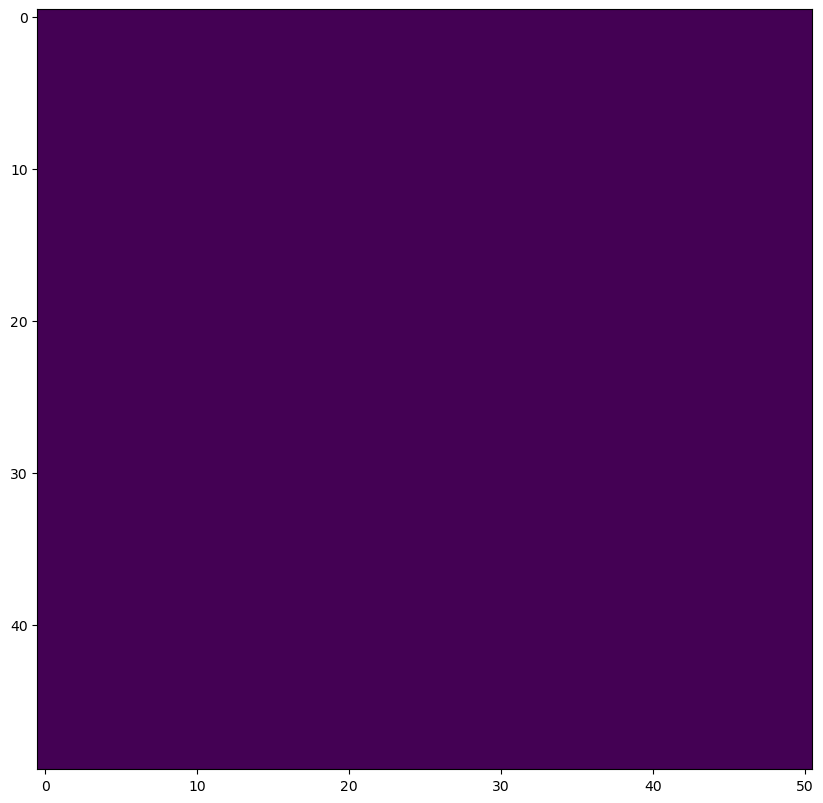

In [19]:
plt.figure(figsize = (10,10), facecolor = 'w')
l = 51
flips2 = flips[:flips.size//l*l].reshape((-1,l))
plt.imshow(flips2[:50], aspect = 1)
flips2T = flips2.T.ravel()